In [296]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.linear_model import Ridge, Perceptron, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from math import sin, pi

from scipy.linalg import norm

# data

In [184]:
data_one_big_hole = pd.read_excel('data/uniaxial_one_big_hole.xlsx')

In [185]:
n = data_one_big_hole.shape[0]
data_one_big_hole.shape

(74910, 4)

In [186]:
data_one_big_hole.columns

Index(['I1', 'I2', 'd(psi)/d(I1)', 'd(psi)/d(I2)'], dtype='object')

In [277]:
data_one_big_hole['d(psi)/d(I2)'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
74905    False
74906    False
74907    False
74908    False
74909    False
Name: d(psi)/d(I2), Length: 74910, dtype: bool

In [278]:
X = data_one_big_hole.drop(columns=['d(psi)/d(I1)', 'd(psi)/d(I2)'])
y = data_one_big_hole.drop(columns=['d(psi)/d(I1)', 'I1', 'I2'])

In [68]:
X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=0.2, random_state=0)

# linear models

In [69]:
X_linear = data_one_big_hole.drop(columns=['I1', 'd(psi)/d(I1)', 'd(psi)/d(I2)'])
y_linear = data_one_big_hole.drop(columns=['d(psi)/d(I1)', 'I1', 'I2'])

In [70]:
X_train, X_test, y_train, y_test = \
                train_test_split(X_linear, y_linear, test_size=0.2, random_state=0)

In [71]:
X_train.shape, y_train.shape

((59928, 1), (59928, 1))

In [72]:
parameter_dict = {
    "alpha" : np.exp(np.linspace(-7, 5, 100))
}

gscv = GridSearchCV(estimator=Ridge(), param_grid=parameter_dict,
                  scoring='neg_mean_squared_error', cv=2)

In [73]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=Ridge(),
             param_grid={'alpha': array([9.11881966e-04, 1.02939104e-03, 1.16204284e-03, 1.31178872e-03,
       1.48083151e-03, 1.67165789e-03, 1.88707499e-03, 2.13025167e-03,
       2.40476515e-03, 2.71465363e-03, 3.06447569e-03, 3.45937734e-03,
       3.90516772e-03, 4.40840460e-03, 4.97649076e-03, 5.61778297e-03,
       6.34171488e-03, 7.15893581e-03, 8.08146737e-03, 9....
       9.13507328e+00, 1.03122585e+01, 1.16411409e+01, 1.31412689e+01,
       1.48347099e+01, 1.67463750e+01, 1.89043856e+01, 2.13404869e+01,
       2.40905147e+01, 2.71949230e+01, 3.06993789e+01, 3.46554342e+01,
       3.91212840e+01, 4.41626226e+01, 4.98536099e+01, 5.62779626e+01,
       6.35301853e+01, 7.17169609e+01, 8.09587199e+01, 9.13914122e+01,
       1.03168506e+02, 1.16463248e+02, 1.31471208e+02, 1.48413159e+02])},
             scoring='neg_mean_squared_error')

In [74]:
gscv.best_params_

{'alpha': 0.0009118819655545162}

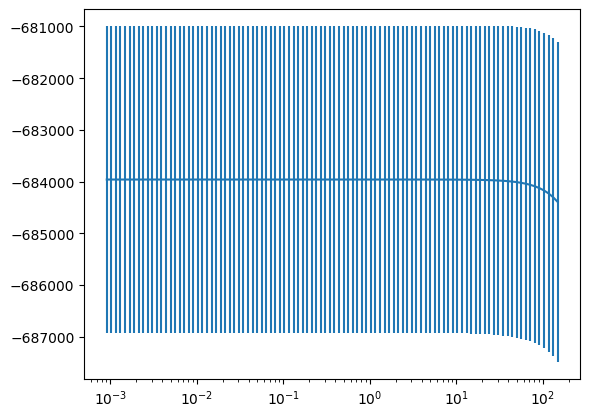

In [75]:
plt.errorbar(x=parameter_dict['alpha'],
            y=gscv.cv_results_['mean_test_score'],
            yerr=gscv.cv_results_['std_test_score'] / gscv.cv**0.5)
plt.xscale('log')

# perceptron

In [76]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  


In [77]:
def mse(model, y_pred, y_train, y_test, X_train):
    mse_train = mean_squared_error(y_train, model.predict(X_train))
    mse_test = mean_squared_error(y_test, y_pred)

    print("Train MSE:", mse_train )
    print("Test MSE:", mse_test)

In [78]:
X_train

,I2
43719,2.351721
18465,1.169730
72659,2.525704
38369,1.576193
67156,2.764309
...,...
21243,1.565539
45891,1.877103
42613,1.856453
43567,1.546910


In [79]:
def scale_data(data, inverse=False):
    scaler = StandardScaler()
    scaler.fit(data)

    if inverse:
        return scaler.inverse_transform(data)
    else:
        return scaler.fit_transform(data)

In [80]:
X_train_reg = scale_data(X_train)
X_test_reg = scale_data(X_test)
y_train_reg = scale_data(y_train)
y_test_reg = scale_data(y_test)

In [81]:
clf = MLPRegressor(activation='tanh', random_state=0, hidden_layer_sizes=270)

In [ ]:
# clf.loss = Piola_Kirchgoff(C) 

In [82]:
clf.fit(X_train_reg, y_train_reg)

/home/mmbmgp/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', hidden_layer_sizes=270, random_state=0)

In [83]:
y_pred = clf.predict(X_test_reg)

In [84]:
y_pred

array([ 0.74801497, -0.97346512, -1.17387029, ...,  0.33249001,
        1.15042827,  1.24854057])

In [ ]:
mse(clf, y_pred, y_train_reg, y_test_reg, X_train_reg)

# save model

In [ ]:
import joblib

def save_model(model):
    # Сохранение весов модели
    joblib.dump(clf, 'model.joblib')

# Загрузка весов модели
loaded_model = joblib.load('model.joblib')

# Использование загруженной модели для предсказания
X_test = [[3, 3], [4, 4]]
y_pred = loaded_model.predict(X_test)
print(y_pred)

# search optimal metaparameters 

In [ ]:
parameter_dict = {
    "hidden_layer_sizes" : [(100 + i * 10, ) for i in range(10, 20)],
    "max_iter" : [(100 + i * 10 ) for i in range(20)]
}

gscv = GridSearchCV(estimator=MLPRegressor(), param_grid=parameter_dict,
                  scoring='neg_mean_squared_error', cv=2)

In [ ]:
# gscv.fit(X_train_reg, y_train_reg)

In [ ]:
gscv.best_params_

In [ ]:
# plt.errorbar(x=parameter_dict['hidden_layer_sizes'],
#             y=gscv.cv_results_['mean_test_score'],
#             yerr=gscv.cv_results_['std_test_score'] / gscv.cv**0.5)
# plt.xscale('log')

In [ ]:
from random import random
from math import sin, pi

# generate tensors Piola-Kirchgoff
    

In [ ]:
def generate_Cauchy(eps=1, delta=sin(pi/3)):
    s1 = np.random.uniform(1 / (1 + eps), 1 + eps)
    s2 = np.random.uniform(1 / (1 + eps), 1 + eps)
    s3 = np.random.uniform(0, delta)
    
    Cauchy = np.array([[s1 **2, s1 * s2 * s3],
                      [s1 * s2 * s3, s2 **2]])
    return Cauchy

In [ ]:
invariant_1 = lambda C: np.trace(C)
invariant_2 = lambda C: 0.5 * (invariant_1(C) ** 2 - invariant_1(C ** 2))

In [ ]:
C = generate_Cauchy()
print("_______Testig functions_______")
print("Right strain tensor Cauchy = \n",  C)
print("I1 =",invariant_1(C))
print("I2 =",invariant_2(C))

In [ ]:
f_1 = 6600 / 2
f_2 = lambda invariant: - 2 / invariant ** 2 

In [ ]:
G_1 = np.eye(2)
G_2= lambda C: invariant_1(C) * np.eye(2) - C

In [ ]:
Piola_Kirchgoff = lambda C: f_1 * G_1 + f_2(invariant_2(C)) * G_2(C)

In [ ]:
Piola_Kirchgoff(C)

In [ ]:
C_arr = [generate_Cauchy() for C in range(n)]
inv1_arr = [invariant_1(C_arr[i]) for i in range(n)]
inv2_arr = [invariant_2(C_arr[i]) for i in range(n)]
f1_arr = [f_1] * n
f2_arr = [f_2(inv2_arr[i]) for i in range(n)]
stress_arr = [Piola_Kirchgoff(C_arr[i]) for i in range(n)]

# test

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
Piola_Kirchgoff = lambda C: f_1 * G_1 +  * G_2(C)

In [ ]:
def mean_abs_error(y_true, y_predict):
    
    return np.abs(Piola_Kirchgoff(C)-np.array(y_predict)).mean()

mean_abs_scorer = make_scorer(mean_abs_error, greater_is_better=False)

In [ ]:
clf = MLPRegressor(activation='tanh', random_state=0)

In [ ]:
parameter_dict = {
    "hidden_layer_sizes" : [(100 + i * 10, ) for i in range(10)]
}

gscv = GridSearchCV(estimator=MLPRegressor(), param_grid=parameter_dict,
                  scoring=mean_abs_scorer, cv=2)

In [ ]:
# gscv.fit(X_train_reg, y_train_reg)

In [ ]:
gscv.best_params_

In [ ]:
gscv.cv_results_

In [ ]:
gscv.best_score_

In [ ]:
mse(clf, y_pred, y_train_reg, y_test_reg, X_train_reg)

In [ ]:
x1 = [[1000, 0.1], [1000, 0.2], [1000, 0.3], [1000, 0.4]]
x2= [[0.001, 0.3], [0.001, 0.4], [0.001, 0.5], [0.001, 0.6]]
mean_squared_error(x1, x2)

In [ ]:
scale_data(np.transpose(x1)[0])

In [ ]:
scale_data(x1)

In [ ]:
x3 = np.transpose(x1)[1].reshape(-1, 1)
x3_reg = scale_data(x3)
x3_reg

In [ ]:
def scale_data(data, inverse=False):
    scaler = MinMaxScaler()
    scaler.fit(data)

    if inverse:
        return scaler.inverse_transform(data)
    else:
        return scaler.fit_transform(data)

In [ ]:
def inverse_scale(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.inverse_transform(data)

In [ ]:
X_reg = scale_data(X)
X_reg

In [ ]:
scale_data(X_reg, True)

In [ ]:
y = data_one_big_hole.drop(columns=['I1', 'I2'])

In [ ]:
scaler = StandardScaler()
scaler.fit(y)
y_scaled = scaler.transform(y)
scaler.inverse_transform(y_scaled)

In [ ]:
y

In [ ]:
from sklearn.preprocessing import StandardScaler

class CustomScaler(StandardScaler):
    def __init__(self, with_mean=True, with_std=True):
        super().__init__(with_mean=with_mean, with_std=with_std)
        
    def fit_transform(self, X):
        X_scaled = super().fit_transform(X)
        # добавляем свою логику обработки данных
        return X_scaled


In [ ]:
scale = StandardScaler()


In [ ]:
scaler = CustomScaler()
y_scaled = scaler.fit_transfor(y)
print(y_scaled)


In [ ]:
scaler2 = CustomScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)


In [ ]:

import pandas as pd

# Создаем первый датафрейм
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                    'value': [1, 2, 3, 4]})

# Создаем второй датафрейм
df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                    'value': [5, 6, 7, 8]})

# Объединяем датафреймы по колонке 'key'
merged_df = pd.concat([df1, df2], ignore_index=True)

print(df1)
print(df2)
print(merged_df)


In [ ]:
I1 = 1
I2 = 2

In [ ]:
import pandas as pd

In [ ]:
a = [1, 2, 3, 4, 5]
b = ['a', 'b', 'c', 'd', 'e']

df = pd.DataFrame({'Column A': a, 'Column B': b})
print(df)


In [209]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

class MLPRegressorWrapper(MLPRegressor):
    
    def __init__(self, activat, ff):
        self.name =activat
        self.gg = ff
        super().__init__(self,activation=self.name, hidden_layer_sizes=self.gg)
        self.scaler = StandardScaler()

    def get_scale_params(self):
        return self.scaler.mean_, self.scaler.scale_

    def set_scale_params(self, mean, scale):
        self.scaler.mean_ = mean
        self.scaler.scale_ = scale
        



In [210]:
new_clf = MLPRegressorWrapper('tanh',(100,))

TypeError: MLPRegressor.__init__() got multiple values for argument 'hidden_layer_sizes'

In [211]:
new_clf.set_scale_params(0,1)


In [203]:
new_clf.fit(X_train_reg, y_train_reg)

/home/mmbmgp/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'MLPRegressorWrapper' object has no attribute 'activat'

AttributeError: 'MLPRegressorWrapper' object has no attribute 'activat'

In [177]:
model = MLPRegressor(activation='tanh', hidden_layer_sizes=(100,))

In [178]:
model.fit(X_train_reg,y_train_reg)

/home/mmbmgp/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh')

In [197]:

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

class MLPRegressorWrapper:
    def __init__(self, a = (100,), activation='relu', solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5,
                 max_iter=200, shuffle=True, random_state=None, tol=1e-4, verbose=False, warm_start=False,
                 momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1,
                 beta_1=0.9, beta_2=0.999, epsilon=1e-8):
        self.scaler = StandardScaler()
        self.model = MLPRegressor(hidden_layer_sizes=a, activation=activation, solver=solver,
                                  alpha=alpha, batch_size=batch_size, learning_rate=learning_rate,
                                  learning_rate_init=learning_rate_init, power_t=power_t, max_iter=max_iter,
                                  shuffle=shuffle, random_state=random_state, tol=tol, verbose=verbose,
                                  warm_start=warm_start, momentum=momentum, nesterovs_momentum=nesterovs_momentum,
                                  early_stopping=early_stopping, validation_fraction=validation_fraction,
                                  beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)

    def get_scale_params(self):
        return self.scaler.mean_, self.scaler.scale_

    def set_scale_params(self, mean, scale):
        self.scaler.mean_ = mean
        self.scaler.scale_ = scale
    

In [198]:
vvv = MLPRegressorWrapper()

In [199]:
vvv.dd(X_train_reg,y_train_reg)

/home/mmbmgp/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [282]:
from skl2onnx import convert_sklearn  # noqa: E402
from skl2onnx.common.data_types import FloatTensorType  # noqa: E402

/home/mmbmgp/.local/lib/python3.10/site-packages/skl2onnx/algebra/onnx_ops.py:159: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  tys = obj.typeStr or ''
/home/mmbmgp/.local/lib/python3.10/site-packages/skl2onnx/algebra/automation.py:154: UserWarning: OpSchema.FormalParameter.isHomogeneous is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.is_homogeneous instead.
  if getattr(obj, 'isHomogeneous', False):
/home/mmbmgp/.local/lib/python3.10/site-packages/jinja2/environment.py:485: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  return getattr(obj, attribute)


In [287]:
initial_type = [("float_input", FloatTensorType([None, 2]))]
onx = convert_sklearn(clf, initial_types=initial_type)
with open("logreg_iris.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [288]:
import onnxruntime as rt  # noqa: E402

sess = rt.InferenceSession("logreg_iris.onnx", providers=rt.get_available_providers())

print(f"input name='{sess.get_inputs()[0].name}' and shape={sess.get_inputs()[0].shape}")
print(f"output name='{sess.get_outputs()[0].name}' and shape={sess.get_outputs()[0].shape}")

Fail: [ONNXRuntimeError] : 1 : FAIL : Load model from logreg_iris.onnx failed:Node (MatMul) Op (MatMul) [ShapeInferenceError] Incompatible dimensions for matrix multiplication

In [293]:
clf.predict(np.array([0.1, 0.2]).reshape(-1,1))

array([0.50092845, 0.56701047])

In [295]:
np.array([0.1, 0.2]).reshape(-1,1)

array([[0.1],
       [0.2]])

In [303]:
matr = np.array([[1, 1], [2,2]] )
matr2 = np.array([[2, 2], [3,4]])
norm(matr - matr2, ord="fro")

2.6457513110645907